# CLP CLASS Experiment Data Analysis
This document is intended to analyse and visualise data from experiments outlined in chapter 10 for vegetation-atmosphere interaction.

In [1]:
import xarray as xr
import pandas as pd 
import matplotlib.pyplot as plt
from datetime import timedelta
import math
import numpy as np
import pandas as pd
from matplotlib import ticker
import matplotlib.colors as mcolors
from collections import Counter

In [2]:
#The standardised names of each experiment output courtesy of Étienne
experiment_names = [
    'E1_Control_BLT',
    'E1_Control_Grass',
    'E1_Control_NLT',
    'E1_Wet_BLT',
    'E1_Wet_Grass',
    'E1_Wet_NLT',
    'E2_Control_BLT',
    'E2_Control_Grass',
    'E2_Control_NLT',
    'E2_Hot_BLT',
    'E2_Hot_Grass',
    'E2_Hot_NLT',
    'E3_Control_BLT',
    'E3_Control_Grass',
    'E3_Control_NLT',
    'E3_Dry_BLT',
    'E3_Dry_Grass',
    'E3_Dry_NLT',
    'E4_Control_BLT',
    'E4_Control_Grass',
    'E4_Control_NLT',
    'E4_Dry_BLT',
    'E4_Dry_Grass',
    'E4_Dry_NLT',
    'E5_Control_BLT',
    'E5_Control_Grass',
    'E5_Control_NLT',
    'E5_StrongStab_BLT',
    'E5_StrongStab_Grass',
    'E5_StrongStab_NLT',
    'E5_WeakStab_BLT',
    'E5_WeakStab_Grass',
    'E5_WeakStab_NLT',
    'E6_Control_BLT',
    'E6_Control_Grass',
    'E6_Control_NLT',
    'E6_Dry_BLT',
    'E6_Dry_Grass',
    'E6_Dry_NLT',
    'E6_Wet_BLT',
    'E6_Wet_Grass',
    'E6_Wet_NLT',
    'E7_BSA_BLT',
    'E7_BSA_Grass',
    'E7_BSA_NLT',
    'E7_BS_BLT',
    'E7_BS_Grass',
    'E7_BS_NLT',
    'E7_Vege_BLT',
    'E7_Vege_Grass',
    'E7_Vege_NLT',
    'E8_Clay_BLT',
    'E8_Clay_Grass',
    'E8_Clay_NLT',
    'E8_Sand_BLT',
    'E8_Sand_Grass',
    'E8_Sand_NLT',
    'E8_SandyLoam_BLT',
    'E8_SandyLoam_Grass',
    'E8_SandyLoam_NLT',
    'E9_Clay_BLT',
    'E9_Clay_Grass',
    'E9_Clay_NLT',
    'E9_Sand_BLT',
    'E9_Sand_Grass',
    'E9_Sand_NLT',
    'E9_SandyLoam_BLT',
    'E9_SandyLoam_Grass',
    'E9_SandyLoam_NLT',
    'E10_Sand_BLT',
    'E10_Sand_Grass',
    'E10_Sand_NLT',
    'E10_SandyLoam_BLT',
    'E10_SandyLoam_Grass',
    'E10_SandyLoam_NLT',
    'E11_Control_BLT',
    'E11_Control_Grass',
    'E11_Control_NLT',
    'E11_Dew_BLT',
    'E11_Dew_Grass',
    'E11_Dew_NLT'
]

path = '/home/Dropbox/school/assignments/CLP/dev3/'

#The dictionary to hold each experiment name and its corresponding csv file imported as xarray
experiment = {}

#Populating the dictionary with the experiment name as the key
for experiment_name in experiment_names:
    for experiment_index in range(1,12):
        if f'E{experiment_index}_' in experiment_name:
            #Read the csv file into pandas dataframe
            df = pd.read_csv(f'{path}E{experiment_index}/{experiment_name}.csv')
    
            #convert the dataframe to xarray
            ds = xr.Dataset.from_dataframe(df)
        
            #add the xarray to the experiment dictionary
            experiment[experiment_name] = ds

#Create the descriptions for all variables
variable_names = experiment['E1_Control_BLT'].keys() #should be the same for each


#--Non-functional--
# variables_table =  pd.read_excel(f'{path}/variables_table.xlsx')
# description_column = xr.Dataset.from_dataframe(variables_table)['Description'].values
# variable_column = xr.Dataset.from_dataframe(variables_table)['Variable'].values
# description = dict(zip(variable_column,description_column))

In [3]:
#For graphing the values
line_properties = [experiment_name.split('_') for  experiment_name in experiment_names]
experiment_properties = list(zip(*line_properties))

colour_keys = set(experiment_properties[1])
style_keys = set(experiment_properties[2])

print(colour_keys)
print(style_keys)


#Populate the dictionary for the width and colour linestyles
color_map = {
    'Hot': '#FF4500',          # Bright orange-red for heat
    'Vege': '#228B22',         # Forest green for vegetation
    'Dry': '#F4A460',          # Sandy brown for dryness
    'Sand': '#FFD700',         # Golden yellow for sand
    'Dew': '#87CEEB',          # Sky blue for dew
    'Wet': '#4682B4',          # Steel blue for wetness
    'BSA': '#8B4513',          # Saddle brown for bare soil areas
    'Clay': '#D2691E',         # Chocolate brown for clay
    'SandyLoam': '#F5DEB3',    # Wheat for sandy loam
    'StrongStab': '#800080',   # Purple for strong stability
    'WeakStab': '#FF69B4',     # Pink for weak stability
    'BS': '#A9A9A9',           # Dark gray for bare soil
    'Control': '#000000'       # Black for control
}

style_map = {
    'BLT' : '-' ,
    'Grass' :':',
    'NLT' : '-.'
}


{'StrongStab', 'Dew', 'Wet', 'Clay', 'BSA', 'BS', 'Hot', 'SandyLoam', 'WeakStab', 'Dry', 'Control', 'Sand', 'Vege'}
{'NLT', 'BLT', 'Grass'}


In [4]:
#formatting function for the plot
def format_timedelta(hours, _):
    h = int(hours // 1)
    m = int((hours % 3600) // 60)
    return f"{h:02}h{m:02}"

# x = pd.to_timedelta(experiment['E1_Control_BLT']['time [h UTC]'],unit='h')

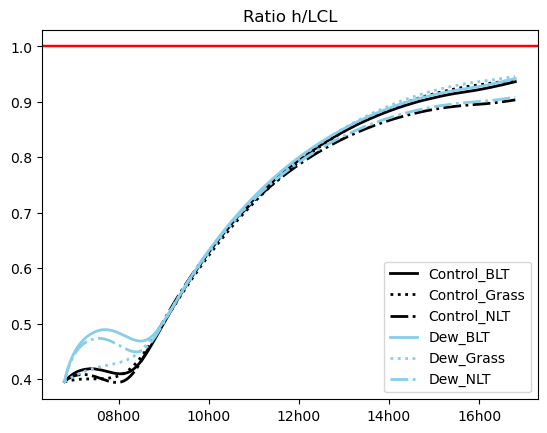

In [5]:
x = experiment['E1_Control_BLT']['time [h UTC]'] #always plotting time along the x-axis
ex_name =    ['E11_Control_BLT',
    'E11_Control_Grass',
    'E11_Control_NLT',
    'E11_Dew_BLT',
    'E11_Dew_Grass',
    'E11_Dew_NLT']

fig = plt.figure()
ax = fig.add_subplot()
plt.title('Ratio h/LCL')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_timedelta))

for name in ex_name:
    properties_of_experiment = name.split('_')
    lc = color_map[properties_of_experiment[1]]
    ls = style_map[properties_of_experiment[2]]
    plt.axhline(y=1.0, color='r', linestyle='-')
    
    y1 = experiment[name]['h [m]']
    y2 = experiment[name]['LCL [m]']
    y = y1/y2
    ax.plot(x,y,label=name.split('_', 1)[1],linestyle=ls,linewidth=2.0,color = lc)
plt.legend()
plt.show()
    

In [6]:
x = experiment['E1_Control_BLT']['time [h UTC]'] #always plotting time along the x-axis

#Cycling through each experiment
for experiment_index in range(1,12):
# for experiment_index in range(6,12):
    #Selecting each of the experiments 1-12, there are easier ways to do this but this works
    names = [i for i in experiment_names if i.startswith(f'E{experiment_index}_')]
    

    #Creating the graph of a particular variable
    for variable in variable_names:
        fig = plt.figure()
        ax = fig.add_subplot()
        plt.title(f'E{experiment_index} {variable}')
        plt.ylabel(variable)
        plt.xlabel('time [h]')
        ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_timedelta))
        #Plotting each experiment on the same graph
        for name in names :
            y = experiment[name][variable]
            

            #Determine the line style to use for each experience
            properties_of_experiment = name.split('_')
            lc = color_map[properties_of_experiment[1]]
            ls = style_map[properties_of_experiment[2]]


            #hot wet control dry weak sand clay BSA BS Vege StrongStab Clay Sand Loam
            
            ax.plot(x,y,label=name.split('_', 1)[1],linestyle=ls,linewidth=2.0,color = lc)
        plt.legend()

        #Save or display the figure
        plt.savefig(f'{path}/E{experiment_index}/E{experiment_index}_{variable}.png')
        # plt.show()
        plt.close()
            